# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from dateutil import tz
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

## Load in Data

In [2]:
'''
Assign column names, prune dataset to features we want, remove duplicates
'''
df = pd.read_csv('GeoResultsLatest.csv', names = ['index_del', 'Bounding Box', 'Coordinates', 'del', 'DateTime', 'Geo Enabled', 'Language', 'Name', 'Tweet', 'Username', 'del_1', 'del_2', 'del_3', 'del_4', 'del_5'])
df = df.drop(['index_del', 'Bounding Box', 'del', 'Geo Enabled', 'Language', 'Tweet', 'Name', 'del_1', 'del_2', 'del_3', 'del_4', 'del_5'], axis=1)
df = df.drop_duplicates()
df.head()

/Users/JiaHer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,5,6,7,10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Coordinates,DateTime,Username
0,not shown,Wed Jun 20 02:55:54 +0000 2018,xdgspc
1,not shown,Wed Jun 20 02:55:54 +0000 2018,fashazmi
2,not shown,Wed Jun 20 02:55:53 +0000 2018,drdeey1
3,not shown,Wed Jun 20 02:55:53 +0000 2018,najwaazhar01
4,not shown,Wed Jun 20 02:55:53 +0000 2018,LEA_twt


In [5]:
df_all["Day of the Week"] = ""
df_all["Time"] = ""
df_all["Hour"] = ""

In [6]:
from_zone = tz.tzutc()
to_zone = tz.gettz('Asia/Kuala Lumpur')

In [7]:
def clean_datetime(date):
    date = datetime.strptime(str(date), '%a %b %d %H:%M:%S %z %Y')
    date = date.replace(tzinfo=from_zone)
    date = date.astimezone(to_zone)
    return date

df_all['DateTime'] = df_all['DateTime'].apply(clean_datetime)

In [8]:
def add_day_of_week(date):
    return date.weekday

df_all['Day of the Week'] = df_all['DateTime'].apply(add_day_of_week)

In [9]:
def add_time(date):
    return date.strftime('%H:%M:%S')

df_all['Time'] = df_all['DateTime'].apply(add_time)

In [10]:
def add_hour(date):
    return date.strftime('%H')

df_all['Hour'] = df_all['DateTime'].apply(add_hour)

In [12]:
df_all = df_all.sort_values('DateTime')

In [13]:
df_all['normalised_date'] = df_all['DateTime'].dt.normalize()

In [ ]:
df_geotag = df_all[df_all['Coordinates'] != 'not shown']

## Overview of the data

/Users/JiaHer/anaconda3/lib/python3.6/site-packages/pandas/core/sorting.py:257: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  items = np.asanyarray(items)


Text(0.5, 1.0, 'Tweets collected over the data collection period')

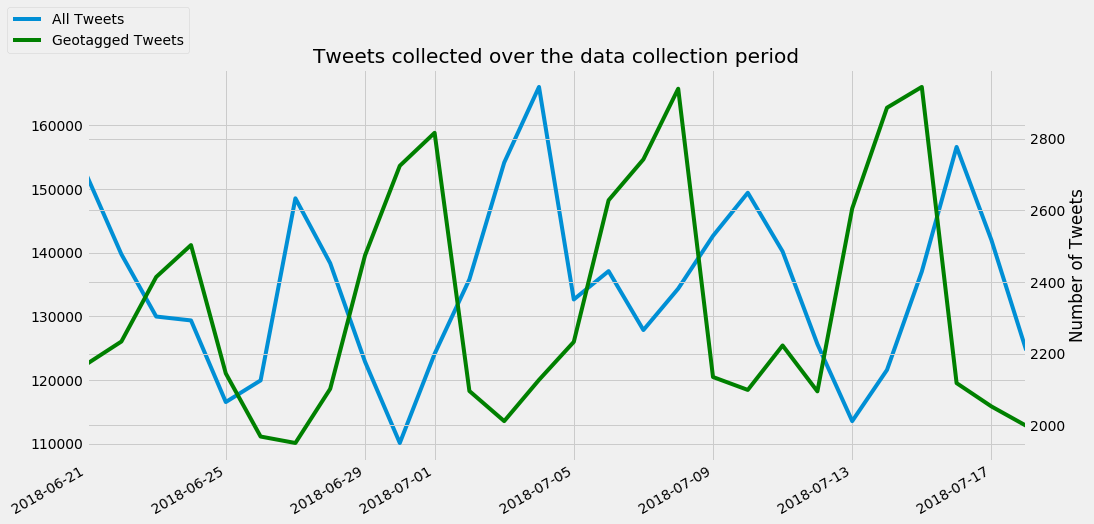

In [81]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = df_all["normalised_date"].value_counts().plot(ax=ax, label='All Tweets')
ax2 = ax.twinx()
ax2 = df_geotag["normalised_date"].value_counts().plot(ax=ax2, color='g', label='Geotagged Tweets')

f.legend(loc='upper left')

plt.ylabel('Number of Tweets')
plt.xlabel('Date of data collection')
plt.title("Tweets collected over the data collection period")

/Users/JiaHer/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0.5, 1.0, 'Percentage of geotagged Tweets over the data collection period')

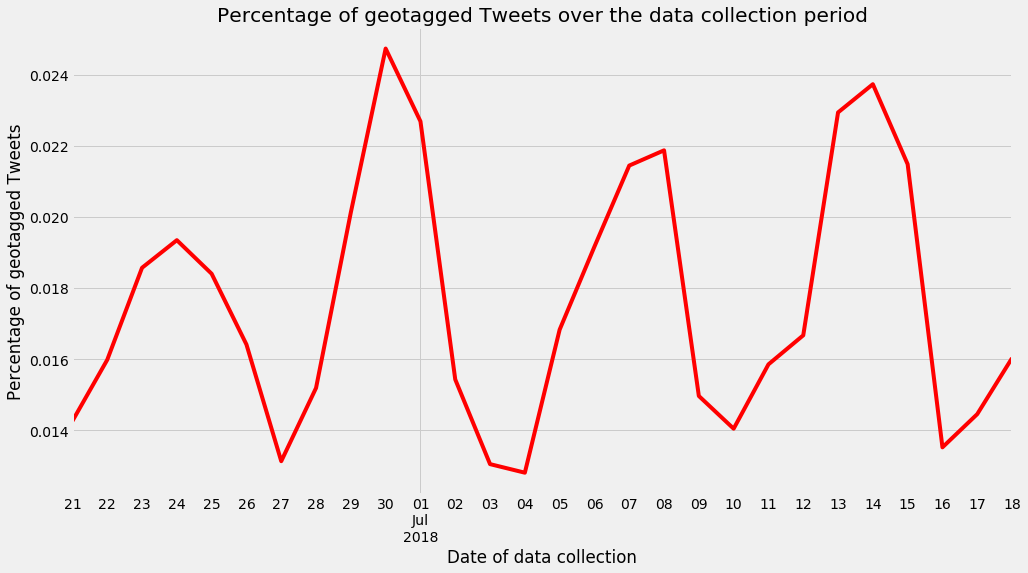

In [56]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = (df_geotag["normalised_date"].value_counts()/df_all["normalised_date"].value_counts()).plot(ax=ax, color='r')

plt.ylabel('Percentage of geotagged Tweets')
plt.xlabel('Date of data collection')
plt.title("Percentage of geotagged Tweets over the data collection period")

## Tweets by day of the week

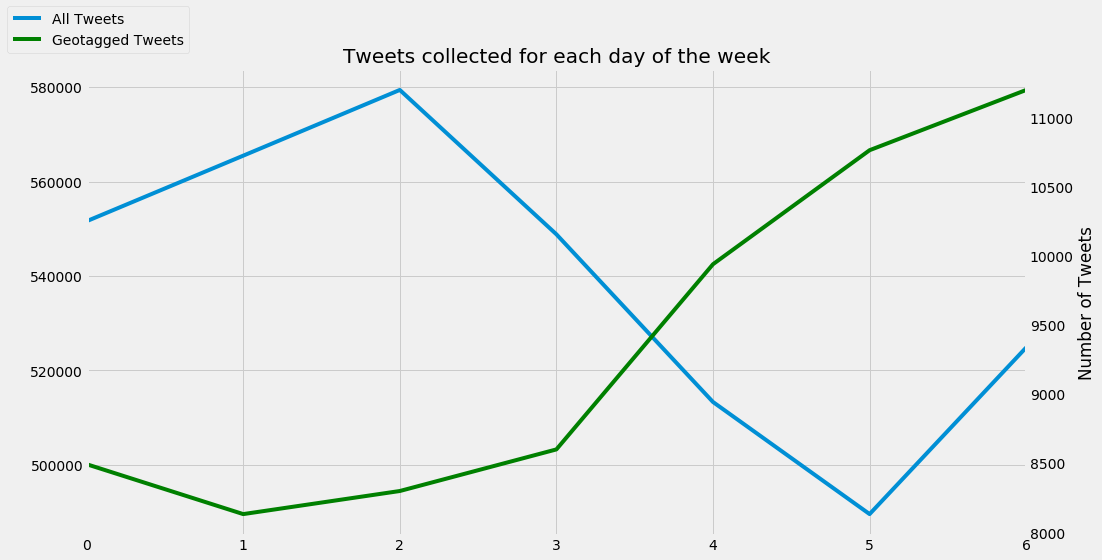

In [82]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = df_all["Day of the Week"].value_counts(sort=False).plot(ax=ax, label='All Tweets')
ax2 = ax.twinx()
ax2 = df_geotag["Day of the Week"].value_counts(sort=False).plot(ax=ax2, color='g', label='Geotagged Tweets')

f.legend(loc='upper left')

plt.ylabel('Number of Tweets')
plt.xlabel('Day of the week')
plt.title("Tweets collected for each day of the week")
plt.grid()

Text(0.5, 1.0, 'Percentage of geotagged Tweets collected for each day of the week')

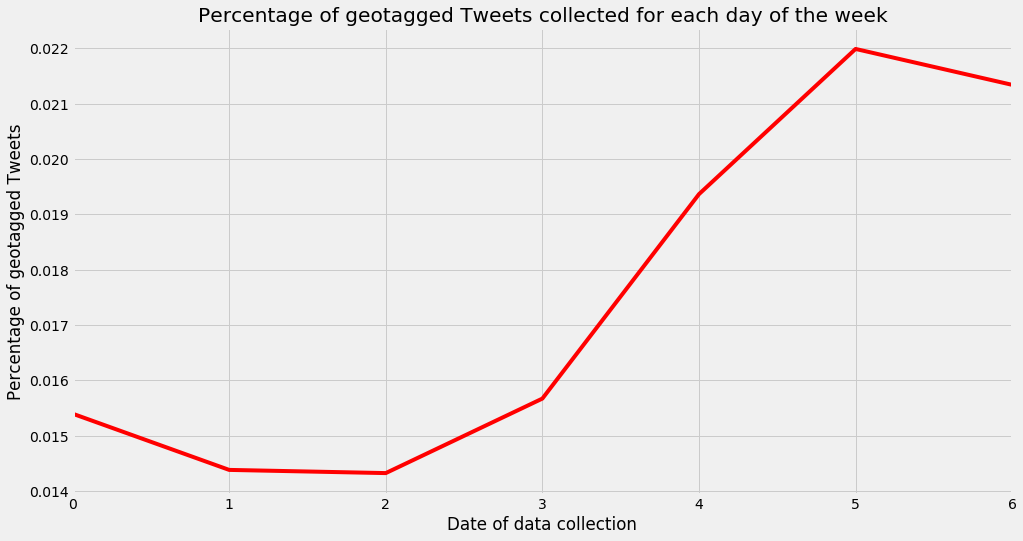

In [58]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = (df_geotag["Day of the Week"].value_counts(sort=False)/df_all["Day of the Week"].value_counts(sort=False)).plot(ax=ax, color='r')

plt.ylabel('Percentage of geotagged Tweets')
plt.xlabel('Date of data collection')
plt.title("Percentage of geotagged Tweets collected for each day of the week")

## Tweets by hour of the day

Text(0.5, 1.0, 'Tweets collected for each hour of the day')

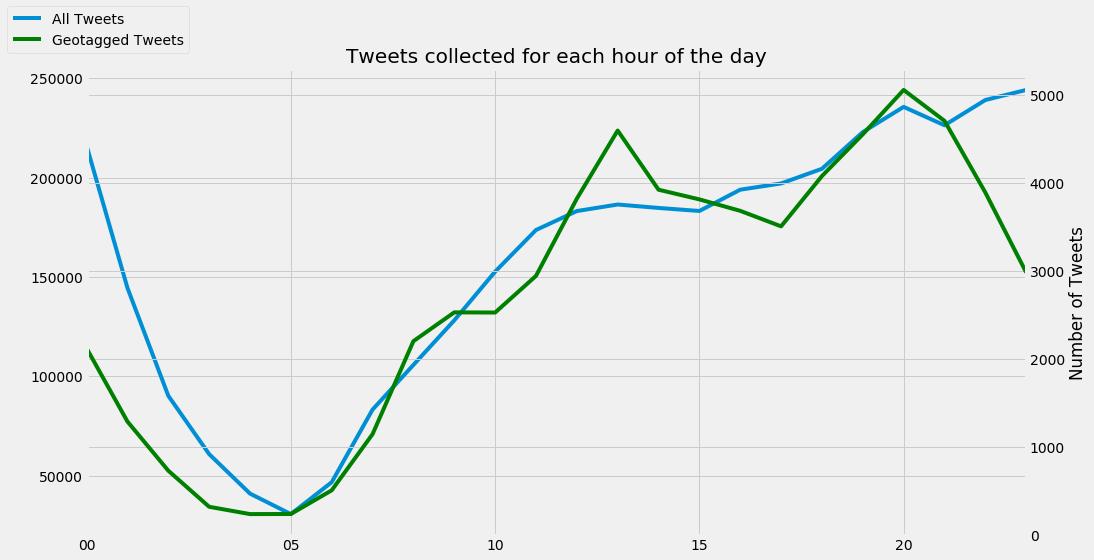

In [83]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = df_all["Hour"].value_counts().sort_index().plot(ax=ax, label='All Tweets')
ax2 = ax.twinx()
ax2 = df_geotag["Hour"].value_counts().sort_index().plot(ax=ax2, color='g', label='Geotagged Tweets')

f.legend(loc='upper left')

plt.ylabel('Number of Tweets')
plt.xlabel('Hour of the day')
plt.title("Tweets collected for each hour of the day")

Text(0.5, 1.0, 'Percentage of geotagged Tweets for each hour of the day')

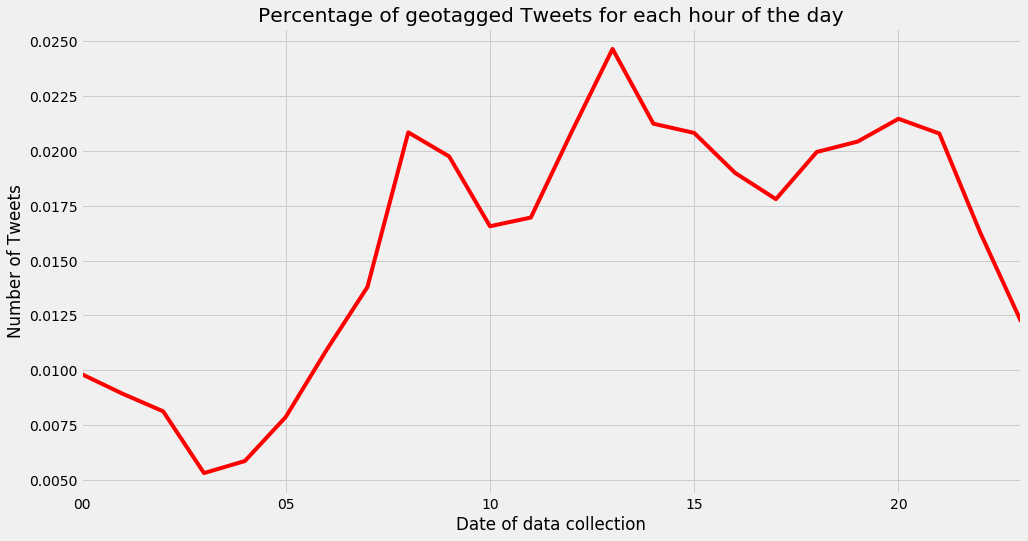

In [60]:
f, ax = plt.subplots(1, figsize=(15, 8))

ax = (df_geotag["Hour"].value_counts().sort_index()/df_all["Hour"].value_counts().sort_index()).plot(ax=ax, color='r')

plt.ylabel('Percentage of Tweets')
plt.xlabel('Date of data collection')
plt.title("Percentage of geotagged Tweets for each hour of the day")

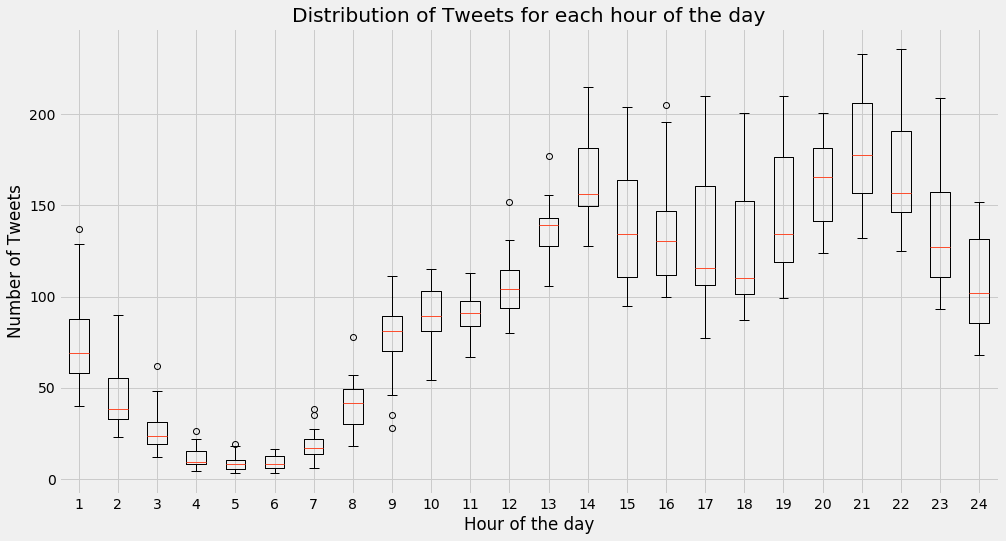

In [66]:
f, ax = plt.subplots(1, figsize=(15, 8))

plt.boxplot(data)

plt.ylabel('Number of Tweets')
plt.xlabel('Hour of the day')
plt.title("Distribution of Tweets for each hour of the day")

plt.show()